# **PyTorch Basics**

[PyTorch](https://pytorch.org/docs/stable/index.html) is an open source machine learning framework in Python. It allows tensor computation with GPU (graphics processing units) and gradients computations. A tensor is basically a multidimensional array. For example, a 1-D tensor is a **vector** and a 2-D tensor is a **matrix**. 
In this tutorial, we first go through the basic tensor operations. 
<!-- GPU is more specially designed for tasks like matrix multiplication.  -->


In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
# Initialize a tensor from a list
list_ = [
         [5 ,2],
         [0, 1],
         [6, 8] # what if I add a 5 here
        ]
t1 = torch.tensor(list_)
print("{} has data type {}".format(t1, t1.dtype))

tensor([[5, 2],
        [0, 1],
        [6, 8]]) has data type torch.int64


In [ ]:
# initialize by specifying the data type:
t1 = torch.tensor(list_, dtype = torch.float)
print("{} has data type {}".format(t1, t1.dtype))

tensor([[5., 2.],
        [0., 1.],
        [6., 8.]]) has data type torch.float32


In [ ]:
# what if I convert it into Bool
t1 = torch.tensor(list_, dtype = torch.bool)
# it basically checks if an entry is zero
print("{} has data type {}".format(t1, t1.dtype))

tensor([[ True,  True],
        [False,  True],
        [ True,  True]]) has data type torch.bool


In [ ]:
# PyTorch is designed to mimic the behavior of the classic package numpy. 
# Thus, it surely can intialize a tensor from a NumPy array. 
array_ = np.array(list_)
tensor_from_array = torch.from_numpy(array_)
print(tensor_from_array)

tensor([[5, 2],
        [0, 1],
        [6, 8]])


In [ ]:
# tensor_from_array.device
if torch.cuda.is_available():
  print("GPU is available")
  tensor_from_array.to('cuda')
tensor_from_array.device
# this above line is problematic

GPU is available


device(type='cpu')

In [ ]:
# tensor operations
torch.ones((4, 3, 2))

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [ ]:
t2  = torch.zeros((3, 2, 2))
print(t2)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])


In [ ]:
# pointwise operations
print(t2 + 1)
print(t2-1) 
print((t2+1)*10) 
print((t2+1)/10) 

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])
tensor([[[-1., -1.],
         [-1., -1.]],

        [[-1., -1.],
         [-1., -1.]],

        [[-1., -1.],
         [-1., -1.]]])
tensor([[[10., 10.],
         [10., 10.]],

        [[10., 10.],
         [10., 10.]],

        [[10., 10.],
         [10., 10.]]])
tensor([[[0.1000, 0.1000],
         [0.1000, 0.1000]],

        [[0.1000, 0.1000],
         [0.1000, 0.1000]],

        [[0.1000, 0.1000],
         [0.1000, 0.1000]]])


In [ ]:
# matrix multiplacations:
x1 = torch.tensor([[1,2],
                   [3,4]])
x2 = torch.tensor([[5,6],
                   [7,8]])
print(x1.matmul(x2)) 
# or we can just use @ operator
# computing x1 times the transpose of x2:
print(x1 @ x2.T)

tensor([[19, 22],
        [43, 50]])
tensor([[17, 23],
        [39, 53]])


In [ ]:
x3 = torch.tensor([  [1,2,3],
                     [4,5,6],
                     [7,8,9]], dtype = float)

print("The mean of all entries = {}".format(x3.mean()))
print("The mean of dimension 0 = {}".format(x3.mean(0)))
print("The mean of dimension 1 = {}".format(x3.mean(1)))
# to compute the standard deviations, use std()

The mean of all entries = 5.0
The mean of dimension 0 = tensor([4., 5., 6.], dtype=torch.float64)
The mean of dimension 1 = tensor([2., 5., 8.], dtype=torch.float64)


In [23]:
# compute differentials 
# initialize with the requires_grad option
x = torch.tensor([2 ], dtype =float, requires_grad=True)
print(x)

tensor([2.], dtype=torch.float64, requires_grad=True)


In [25]:
y = pow(x, 3) # x^3
y.backward()
print(y)
print(x.grad) # d(y)/d(x) = d(x^3)/d(x) = 3x^2 

tensor([8.], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([24.], dtype=torch.float64)


In [26]:
z = pow(x, 2) # x^2
z.backward()
print(x.grad) # d(y)/d(x) = d(x^2)/d(x) = 2x 

tensor([28.], dtype=torch.float64)


x.grad is updated to be the sum of the gradients computed so far. This is handy when training neural networks. During the backpropagation step, the sum of the gradients are summed before the weights are updated. 

# **PyTorch Geometric Basics**


1:Installing dependencies

The standard colab environment does not provide the package of PyG and its dependencies.
We need first to intsall it by the following commonds.

Note: This cell might take a while (up to ~10 minutes) to run

In [3]:
import torch
print("Torch has version {}".format(torch.__version__))

Torch has version 1.12.0+cu113


In [4]:
# Install torch geometric
# Change the version of the pytorch by modifying the url at the end
# For example, the output the above cell is 'Torch has version 1.11.0+cu113'，then the url is "***torch-1.11.0+cu113.html"
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.12.0+cu113.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.12.0+cu113.html
!pip install -q torch-geometric

     |████████████████████████████████| 7.9 MB 4.8 MB/s 
     |████████████████████████████████| 3.5 MB 5.0 MB/s 
     |████████████████████████████████| 407 kB 5.5 MB/s 


In [9]:
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv
from torch_geometric.nn import ChebConv

2: Example of using **Data** in PyG

In tutorial 1 and Q1 of project, we use a class SimpleGraph and DirectedWeightedGraph to store the graph.
The pyg also provide a class called 'Data' to store the graph.

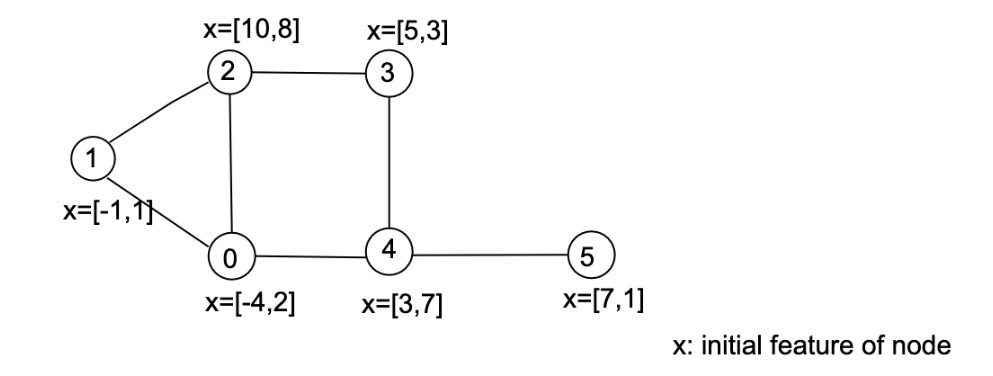

In [6]:
# The connection of edge
# for a undirected graph, use two directed edge to represent it. 
# edge_index is a tensor with shape of 2*edge_num 
edge_index = torch.tensor(
    [
        [0, 1, 0, 2, 1, 2, 2, 3, 4, 0, 4, 3, 5, 4],
        [1, 0, 2, 0, 2, 1, 3, 2, 0, 4, 3, 4, 4, 5],
    ],
    # the type of data
    dtype=torch.long
)

# the initial features of node
x = torch.tensor(
    [
        # there are 6 nodes
        # each node has a feature of length 2
        [-4, 2],
        [-1, 1],
        [10, 8],
        [5, 3],
        [3, 7],
        [7, 1],
    ]
)

# instantiate
data = Data(x=x, edge_index=edge_index)

# There may be other attribute of Data, like y which is the label of each node for 
# node classification

In [7]:
# the whole infomation about graph
print(data)

# the key in the graph
print(data.keys)
print(data.values)

# the feature of node
print(data['x'])
print(data.edge_index)
print(data.num_node_features)

Data(x=[6, 2], edge_index=[2, 14])
['edge_index', 'x']
<bound method BaseStorage.values of {'x': tensor([[-4,  2],
        [-1,  1],
        [10,  8],
        [ 5,  3],
        [ 3,  7],
        [ 7,  1]]), 'edge_index': tensor([[0, 1, 0, 2, 1, 2, 2, 3, 4, 0, 4, 3, 5, 4],
        [1, 0, 2, 0, 2, 1, 3, 2, 0, 4, 3, 4, 4, 5]])}>
tensor([[-4,  2],
        [-1,  1],
        [10,  8],
        [ 5,  3],
        [ 3,  7],
        [ 7,  1]])
tensor([[0, 1, 0, 2, 1, 2, 2, 3, 4, 0, 4, 3, 5, 4],
        [1, 0, 2, 0, 2, 1, 3, 2, 0, 4, 3, 4, 4, 5]])
2


# **Building Blocks of GNN**

### Activation functions

In [ ]:
# activation functions 
t4 = torch.randn(1,5)
print("Consider this tensor: {}".format(t4))
# Relu (linear)
m = nn.ReLU()
activation = m(t4)
print("ReLu activation: {}".format(activation))

Consider this tensor: tensor([[-1.0220, -0.8221,  1.0016,  1.6851, -1.5745]])
ReLu activation: tensor([[0.0000, 0.0000, 1.0016, 1.6851, 0.0000]])


In [ ]:
# Sigmoid (non-linear), output between 0 and 1. 
m = nn.Sigmoid()
activation = m(t4)
print("Sigmoid activation: {}".format(activation))

Sigmoid activation: tensor([[0.2646, 0.3053, 0.7314, 0.8436, 0.1716]])


In [ ]:
# tanh (non-linear), output between -1 and 1. 
m = nn.Tanh()
activation = m(t4)
print("Tanh activation: {}".format(activation))

Tanh activation: tensor([[-0.7707, -0.6762,  0.7623,  0.9335, -0.9177]])


### Message Passing Layer

In [ ]:
# GCN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conv = GCNConv(data.num_node_features, 4).to(device)
x, edge_index = data.x, data.edge_index
print(x)
x = conv(x.to(device).float(), edge_index.to(device))
print(x)

tensor([[-4,  2],
        [-1,  1],
        [10,  8],
        [ 5,  3],
        [ 3,  7],
        [ 7,  1]])
tensor([[ 1.3378, -2.4544, -0.0251, -3.6958],
        [ 0.9453, -1.7440, -0.0216, -2.6256],
        [ 0.4987, -2.3780, -0.5816, -3.5020],
        [-0.1055, -4.0463, -1.6564, -5.8644],
        [-0.1443, -2.6864, -1.1516, -3.8861],
        [-0.8853, -2.8320, -1.7264, -4.0243]], device='cuda:0',
       grad_fn=<AddBackward0>)


### dropout

In [ ]:
print(x)
x = F.dropout(x)
print(x)

tensor([[ 1.3378, -2.4544, -0.0251, -3.6958],
        [ 0.9453, -1.7440, -0.0216, -2.6256],
        [ 0.4987, -2.3780, -0.5816, -3.5020],
        [-0.1055, -4.0463, -1.6564, -5.8644],
        [-0.1443, -2.6864, -1.1516, -3.8861],
        [-0.8853, -2.8320, -1.7264, -4.0243]], device='cuda:0',
       grad_fn=<AddBackward0>)
tensor([[  2.6757,  -0.0000,  -0.0000,  -7.3915],
        [  0.0000,  -3.4880,  -0.0000,  -5.2512],
        [  0.0000,  -4.7560,  -1.1633,  -0.0000],
        [ -0.0000,  -8.0925,  -0.0000, -11.7288],
        [ -0.2885,  -5.3727,  -2.3031,  -0.0000],
        [ -0.0000,  -5.6640,  -0.0000,  -0.0000]], device='cuda:0',
       grad_fn=<NativeDropoutBackward0>)


### log_softmax

In [ ]:
print(x)
x = F.log_softmax(x, dim=1)
print(x)

tensor([[  2.6757,  -0.0000,  -0.0000,  -7.3915],
        [  0.0000,  -3.4880,  -0.0000,  -5.2512],
        [  0.0000,  -4.7560,  -1.1633,  -0.0000],
        [ -0.0000,  -8.0925,  -0.0000, -11.7288],
        [ -0.2885,  -5.3727,  -2.3031,  -0.0000],
        [ -0.0000,  -5.6640,  -0.0000,  -0.0000]], device='cuda:0',
       grad_fn=<NativeDropoutBackward0>)
tensor([[ -0.1291,  -2.8048,  -2.8048, -10.1963],
        [ -0.7109,  -4.1989,  -0.7109,  -5.9621],
        [ -0.8420,  -5.5980,  -2.0053,  -0.8420],
        [ -0.6933,  -8.7858,  -0.6933, -12.4221],
        [ -0.9059,  -5.9900,  -2.9204,  -0.6173],
        [ -1.0998,  -6.7638,  -1.0998,  -1.0998]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)


# **Pipline of Deep Learning**

In [20]:
dataset = Planetoid(root='/tmp/Cora', name='Cora')

class GCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = ChebConv(16, out_channels, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        activation = nn.ReLU()
        x = activation(x)
        x = self.conv2(x, edge_index)
        x = F.dropout(x)
        # try other network structure here.

        return x


# start train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(dataset.num_node_features, dataset.num_classes).to(device)
data = dataset[0].to(device)
print(data)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(20):
    optimizer.zero_grad()
    out = model(data)
    # try other loss function here
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
# start evaluate the model
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Accuracy: 0.4530
